<a href="https://colab.research.google.com/github/jliyue/tempo-emotion-modeling/blob/main/Case_Studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File 16

Saving 16 DATA W RATES TEMPO CHANGE, TEMPO CHANGE %, AROUSAL CHANGE.csv to 16 DATA W RATES TEMPO CHANGE, TEMPO CHANGE %, AROUSAL CHANGE (1).csv

R² Score on Test Set: -0.203
Mean Squared Error: 0.246
Mean Absolute Error: 0.398
Rate_of_Tempo_Change: 0.5204
Tempo_Change_Percentage: 0.4796

===== Extracted Decision Tree Thresholds =====
                    Feature  Threshold
0      Rate_of_Tempo_Change       2.85
1   Tempo_Change_Percentage     -12.55
2      Rate_of_Tempo_Change     -22.13
3      Rate_of_Tempo_Change     -38.02
4   Tempo_Change_Percentage     -48.97
5      Rate_of_Tempo_Change     -44.03
6      Rate_of_Tempo_Change     -26.91
7      Rate_of_Tempo_Change     -31.18
8   Tempo_Change_Percentage     -16.29
9   Tempo_Change_Percentage     -13.64
10     Rate_of_Tempo_Change     -21.58
11     Rate_of_Tempo_Change      -8.86
12  Tempo_Change_Percentage      -6.90
13  Tempo_Change_Percentage      -9.81
14     Rate_of_Tempo_Change     -16.01
15  Tempo_Change_Percentage      -7.74
1

<ipython-input-22-b3b4929057b8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tempo_Change_Sign'] = df_cleaned['Rate_of_Tempo_Change'].apply(lambda x: 'Negative' if x < 0 else 'Positive')


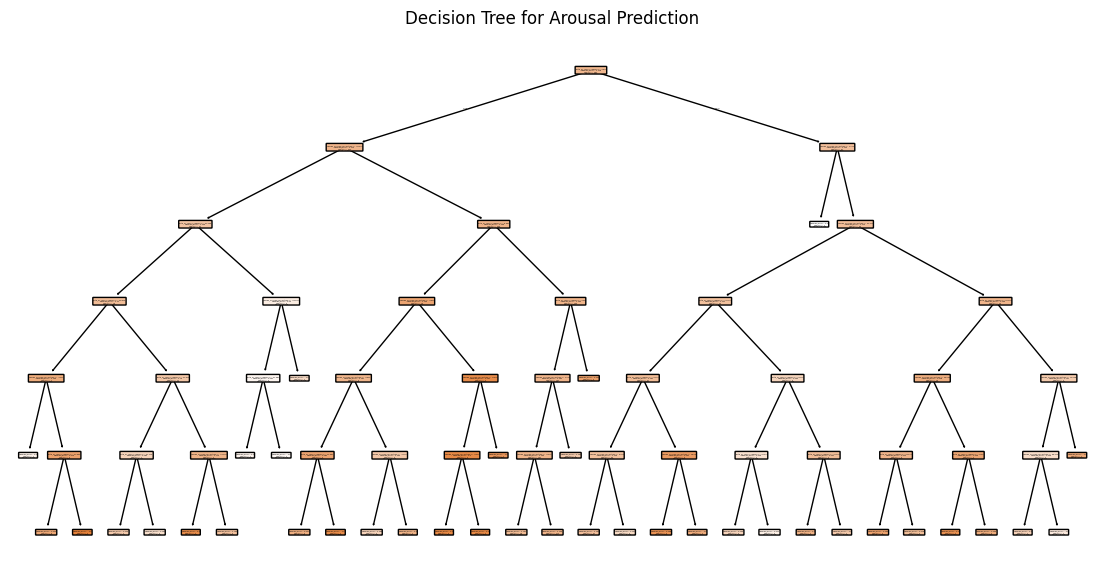

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Upload and load dataset
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# Clean and convert columns
df['Rate_of_Tempo_Change'] = pd.to_numeric(df['Rate_of_Tempo_Change'].astype(str).str.replace('−', '-', regex=False), errors='coerce')
df['Tempo_Change_Percentage'] = pd.to_numeric(df['Tempo_Change_Percentage'], errors='coerce')
df['Arousal'] = pd.to_numeric(df['Arousal'], errors='coerce')

# Drop missing values and create sign column
df_cleaned = df.dropna(subset=['Rate_of_Tempo_Change', 'Tempo_Change_Percentage', 'Arousal'])
df_cleaned['Tempo_Change_Sign'] = df_cleaned['Rate_of_Tempo_Change'].apply(lambda x: 'Negative' if x < 0 else 'Positive')

# Set up X and y
X = df_cleaned[['Rate_of_Tempo_Change', 'Tempo_Change_Percentage']]
y = df_cleaned['Arousal']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit decision tree
decision_tree = DecisionTreeRegressor(max_depth=6, random_state=42)
decision_tree.fit(X_train, y_train)

# Function to extract decision thresholds
def get_decision_tree_thresholds(tree, feature_names):
    thresholds = []
    for node_id in range(tree.node_count):
        if tree.children_left[node_id] != -1:  # not a leaf
            feature = feature_names[tree.feature[node_id]]
            threshold = tree.threshold[node_id]
            thresholds.append((feature, threshold))
    return thresholds

# Use correct column names
decision_thresholds = get_decision_tree_thresholds(decision_tree.tree_, X.columns)
thresholds_df = pd.DataFrame(decision_thresholds, columns=['Feature', 'Threshold'])
thresholds_df['Threshold'] = thresholds_df['Threshold'].round(2)

y_pred = decision_tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nR² Score on Test Set: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")

# Feature importances
importances = decision_tree.feature_importances_
for name, score in zip(X.columns, importances):
    print(f"{name}: {score:.4f}")

# Threshold summary
print("\n===== Extracted Decision Tree Thresholds =====")
print(thresholds_df)
print("Negative rate of tempo change in training data:", (X_train['Rate_of_Tempo_Change'] < 0).sum())
print("Min rate of tempo change:", df['Rate_of_Tempo_Change'].min())
print("Count of negative rate of tempo change values:", (df['Rate_of_Tempo_Change'] < 0).sum())

# Plot tree using correct column names
plt.figure(figsize=(14, 7))
plot_tree(decision_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for Arousal Prediction")
plt.show()


File 15

Saving 15 DATA W RATES TEMPO CHANGE, TEMPO CHANGE %, AROUSAL CHANGE.csv to 15 DATA W RATES TEMPO CHANGE, TEMPO CHANGE %, AROUSAL CHANGE (1).csv

R² Score on Test Set: -0.146
Mean Squared Error: 0.069
Mean Absolute Error: 0.224
Rate_of_Tempo_Change: 0.5248
Tempo_Change_Percentage: 0.4752

===== Extracted Decision Tree Thresholds =====
                    Feature  Threshold
0      Rate_of_Tempo_Change     -32.80
1   Tempo_Change_Percentage     -32.29
2   Tempo_Change_Percentage     -46.33
3   Tempo_Change_Percentage     -24.20
4   Tempo_Change_Percentage     -25.77
5   Tempo_Change_Percentage     -28.89
6   Tempo_Change_Percentage     -11.70
7   Tempo_Change_Percentage      -1.22
8      Rate_of_Tempo_Change      -3.52
9      Rate_of_Tempo_Change      -5.34
10  Tempo_Change_Percentage      -6.35
11  Tempo_Change_Percentage      -8.50
12     Rate_of_Tempo_Change      34.74
13  Tempo_Change_Percentage       2.82
14  Tempo_Change_Percentage       2.45
15  Tempo_Change_Percentage       1.06
1

<ipython-input-23-b3b4929057b8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tempo_Change_Sign'] = df_cleaned['Rate_of_Tempo_Change'].apply(lambda x: 'Negative' if x < 0 else 'Positive')


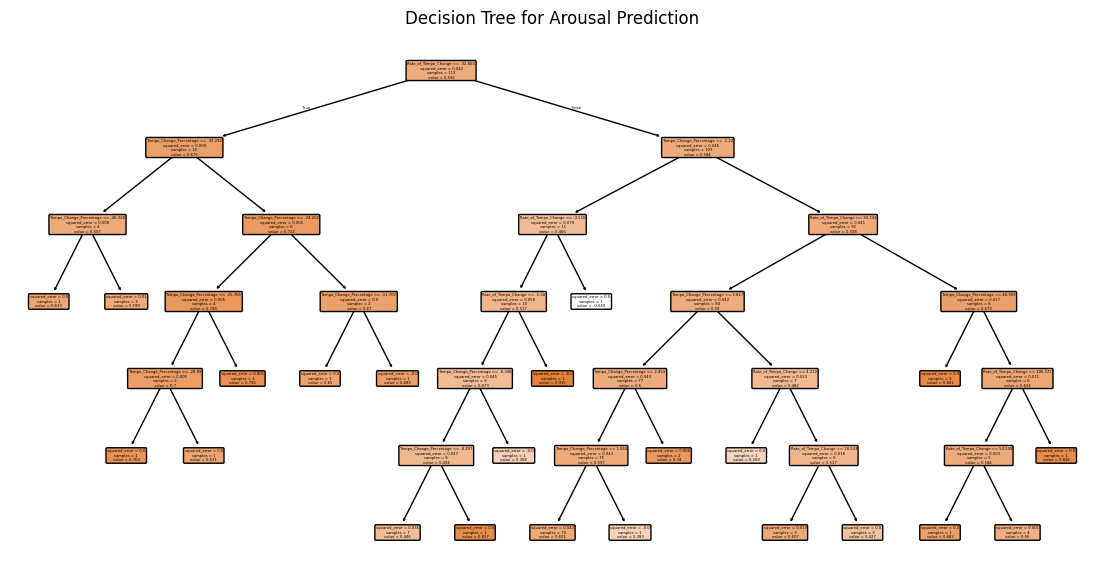

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Upload and load dataset
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# Clean and convert columns
df['Rate_of_Tempo_Change'] = pd.to_numeric(df['Rate_of_Tempo_Change'].astype(str).str.replace('−', '-', regex=False), errors='coerce')
df['Tempo_Change_Percentage'] = pd.to_numeric(df['Tempo_Change_Percentage'], errors='coerce')
df['Arousal'] = pd.to_numeric(df['Arousal'], errors='coerce')

# Drop missing values and create sign column
df_cleaned = df.dropna(subset=['Rate_of_Tempo_Change', 'Tempo_Change_Percentage', 'Arousal'])
df_cleaned['Tempo_Change_Sign'] = df_cleaned['Rate_of_Tempo_Change'].apply(lambda x: 'Negative' if x < 0 else 'Positive')

# Set up X and y
X = df_cleaned[['Rate_of_Tempo_Change', 'Tempo_Change_Percentage']]
y = df_cleaned['Arousal']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit decision tree
decision_tree = DecisionTreeRegressor(max_depth=6, random_state=42)
decision_tree.fit(X_train, y_train)

# Function to extract decision thresholds
def get_decision_tree_thresholds(tree, feature_names):
    thresholds = []
    for node_id in range(tree.node_count):
        if tree.children_left[node_id] != -1:  # not a leaf
            feature = feature_names[tree.feature[node_id]]
            threshold = tree.threshold[node_id]
            thresholds.append((feature, threshold))
    return thresholds

# Use correct column names
decision_thresholds = get_decision_tree_thresholds(decision_tree.tree_, X.columns)
thresholds_df = pd.DataFrame(decision_thresholds, columns=['Feature', 'Threshold'])
thresholds_df['Threshold'] = thresholds_df['Threshold'].round(2)

y_pred = decision_tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nR² Score on Test Set: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")

# Feature importances
importances = decision_tree.feature_importances_
for name, score in zip(X.columns, importances):
    print(f"{name}: {score:.4f}")

# Threshold summary
print("\n===== Extracted Decision Tree Thresholds =====")
print(thresholds_df)
print("Negative rate of tempo change in training data:", (X_train['Rate_of_Tempo_Change'] < 0).sum())
print("Min rate of tempo change:", df['Rate_of_Tempo_Change'].min())
print("Count of negative rate of tempo change values:", (df['Rate_of_Tempo_Change'] < 0).sum())

# Plot tree using correct column names
plt.figure(figsize=(14, 7))
plot_tree(decision_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for Arousal Prediction")
plt.show()


File 14

Saving 14 DATA W RATES TEMPO CHANGE, TEMPO CHANGE %, AROUSAL CHANGE.csv to 14 DATA W RATES TEMPO CHANGE, TEMPO CHANGE %, AROUSAL CHANGE (5).csv

R² Score on Test Set: -0.028
Mean Squared Error: 0.123
Mean Absolute Error: 0.289
Rate_of_Tempo_Change: 0.6109
Tempo_Change_Percentage: 0.3891

===== Extracted Decision Tree Thresholds =====
                    Feature  Threshold
0   Tempo_Change_Percentage     -29.07
1      Rate_of_Tempo_Change     -54.59
2   Tempo_Change_Percentage     -46.16
3      Rate_of_Tempo_Change     -67.33
4   Tempo_Change_Percentage     -32.95
5      Rate_of_Tempo_Change     -53.22
6      Rate_of_Tempo_Change     -37.20
7   Tempo_Change_Percentage     -25.49
8   Tempo_Change_Percentage       2.89
9      Rate_of_Tempo_Change     -27.23
10     Rate_of_Tempo_Change     -31.50
11  Tempo_Change_Percentage      -2.80
12  Tempo_Change_Percentage     -14.77
13  Tempo_Change_Percentage      -1.11
14     Rate_of_Tempo_Change      50.67
15     Rate_of_Tempo_Change      39.14
1

<ipython-input-24-b3b4929057b8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tempo_Change_Sign'] = df_cleaned['Rate_of_Tempo_Change'].apply(lambda x: 'Negative' if x < 0 else 'Positive')


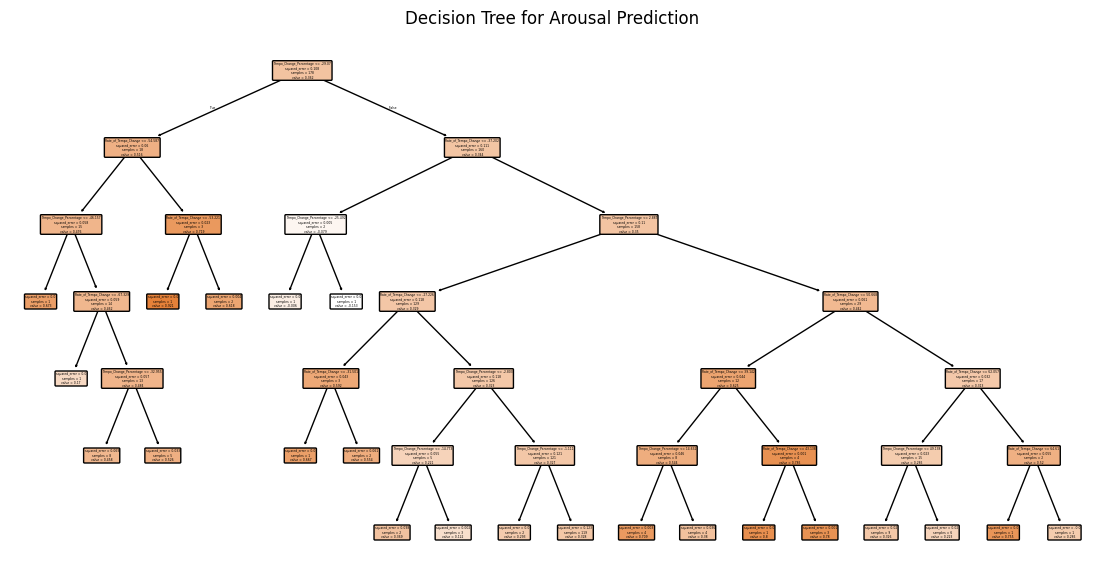

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Upload and load dataset
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# Clean and convert columns
df['Rate_of_Tempo_Change'] = pd.to_numeric(df['Rate_of_Tempo_Change'].astype(str).str.replace('−', '-', regex=False), errors='coerce')
df['Tempo_Change_Percentage'] = pd.to_numeric(df['Tempo_Change_Percentage'], errors='coerce')
df['Arousal'] = pd.to_numeric(df['Arousal'], errors='coerce')

# Drop missing values and create sign column
df_cleaned = df.dropna(subset=['Rate_of_Tempo_Change', 'Tempo_Change_Percentage', 'Arousal'])
df_cleaned['Tempo_Change_Sign'] = df_cleaned['Rate_of_Tempo_Change'].apply(lambda x: 'Negative' if x < 0 else 'Positive')

# Set up X and y
X = df_cleaned[['Rate_of_Tempo_Change', 'Tempo_Change_Percentage']]
y = df_cleaned['Arousal']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit decision tree
decision_tree = DecisionTreeRegressor(max_depth=6, random_state=42)
decision_tree.fit(X_train, y_train)

# Function to extract decision thresholds
def get_decision_tree_thresholds(tree, feature_names):
    thresholds = []
    for node_id in range(tree.node_count):
        if tree.children_left[node_id] != -1:  # not a leaf
            feature = feature_names[tree.feature[node_id]]
            threshold = tree.threshold[node_id]
            thresholds.append((feature, threshold))
    return thresholds

# Use correct column names
decision_thresholds = get_decision_tree_thresholds(decision_tree.tree_, X.columns)
thresholds_df = pd.DataFrame(decision_thresholds, columns=['Feature', 'Threshold'])
thresholds_df['Threshold'] = thresholds_df['Threshold'].round(2)

y_pred = decision_tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nR² Score on Test Set: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")

# Feature importances
importances = decision_tree.feature_importances_
for name, score in zip(X.columns, importances):
    print(f"{name}: {score:.4f}")

# Threshold summary
print("\n===== Extracted Decision Tree Thresholds =====")
print(thresholds_df)
print("Negative rate of tempo change in training data:", (X_train['Rate_of_Tempo_Change'] < 0).sum())
print("Min rate of tempo change:", df['Rate_of_Tempo_Change'].min())
print("Count of negative rate of tempo change values:", (df['Rate_of_Tempo_Change'] < 0).sum())

# Plot tree using correct column names
plt.figure(figsize=(14, 7))
plot_tree(decision_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for Arousal Prediction")
plt.show()


File 21

Saving 21 DATA W RATES TEMPO CHANGE, TEMPO CHANGE %, AROUSAL CHANGE.csv to 21 DATA W RATES TEMPO CHANGE, TEMPO CHANGE %, AROUSAL CHANGE (1).csv

R² Score on Test Set: 0.020
Mean Squared Error: 0.111
Mean Absolute Error: 0.276
Rate_of_Tempo_Change: 0.5289
Tempo_Change_Percentage: 0.4711

===== Extracted Decision Tree Thresholds =====
                    Feature  Threshold
0      Rate_of_Tempo_Change       1.63
1   Tempo_Change_Percentage      -1.19
2   Tempo_Change_Percentage      -2.41
3      Rate_of_Tempo_Change      -4.91
4   Tempo_Change_Percentage     -13.81
5      Rate_of_Tempo_Change      -6.71
6      Rate_of_Tempo_Change       6.39
7   Tempo_Change_Percentage       2.47
8      Rate_of_Tempo_Change      12.22
9   Tempo_Change_Percentage       8.61
10     Rate_of_Tempo_Change       9.83
11     Rate_of_Tempo_Change      16.40
Negative rate of tempo change in training data: 17
Min rate of tempo change: -20.00762195
Count of negative rate of tempo change values: 18


<ipython-input-25-b3b4929057b8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tempo_Change_Sign'] = df_cleaned['Rate_of_Tempo_Change'].apply(lambda x: 'Negative' if x < 0 else 'Positive')


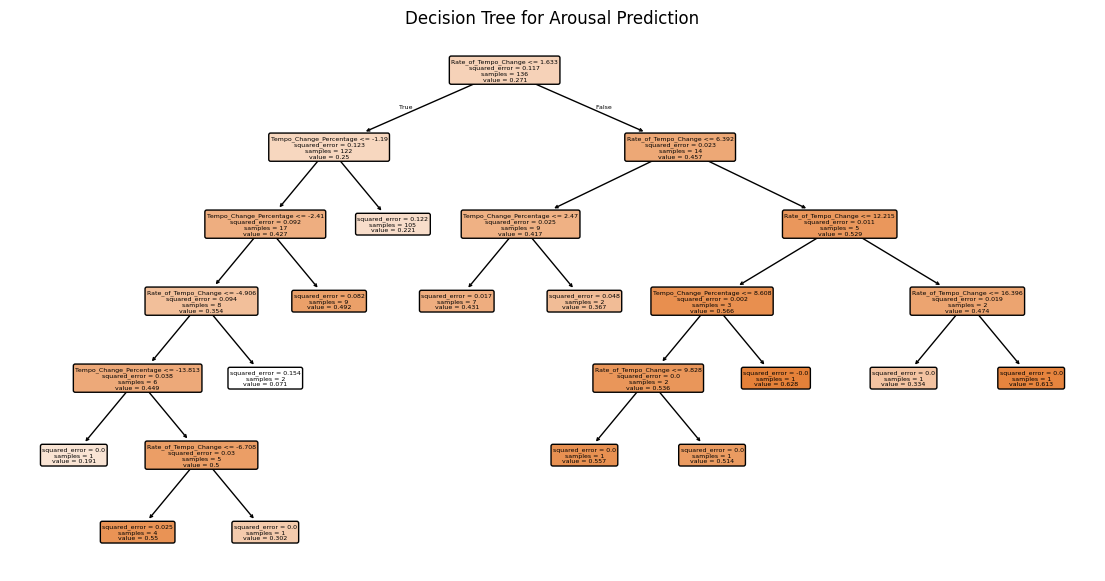

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Upload and load dataset
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# Clean and convert columns
df['Rate_of_Tempo_Change'] = pd.to_numeric(df['Rate_of_Tempo_Change'].astype(str).str.replace('−', '-', regex=False), errors='coerce')
df['Tempo_Change_Percentage'] = pd.to_numeric(df['Tempo_Change_Percentage'], errors='coerce')
df['Arousal'] = pd.to_numeric(df['Arousal'], errors='coerce')

# Drop missing values and create sign column
df_cleaned = df.dropna(subset=['Rate_of_Tempo_Change', 'Tempo_Change_Percentage', 'Arousal'])
df_cleaned['Tempo_Change_Sign'] = df_cleaned['Rate_of_Tempo_Change'].apply(lambda x: 'Negative' if x < 0 else 'Positive')

# Set up X and y
X = df_cleaned[['Rate_of_Tempo_Change', 'Tempo_Change_Percentage']]
y = df_cleaned['Arousal']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit decision tree
decision_tree = DecisionTreeRegressor(max_depth=6, random_state=42)
decision_tree.fit(X_train, y_train)

# Function to extract decision thresholds
def get_decision_tree_thresholds(tree, feature_names):
    thresholds = []
    for node_id in range(tree.node_count):
        if tree.children_left[node_id] != -1:  # not a leaf
            feature = feature_names[tree.feature[node_id]]
            threshold = tree.threshold[node_id]
            thresholds.append((feature, threshold))
    return thresholds

# Use correct column names
decision_thresholds = get_decision_tree_thresholds(decision_tree.tree_, X.columns)
thresholds_df = pd.DataFrame(decision_thresholds, columns=['Feature', 'Threshold'])
thresholds_df['Threshold'] = thresholds_df['Threshold'].round(2)

y_pred = decision_tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nR² Score on Test Set: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")

# Feature importances
importances = decision_tree.feature_importances_
for name, score in zip(X.columns, importances):
    print(f"{name}: {score:.4f}")

# Threshold summary
print("\n===== Extracted Decision Tree Thresholds =====")
print(thresholds_df)
print("Negative rate of tempo change in training data:", (X_train['Rate_of_Tempo_Change'] < 0).sum())
print("Min rate of tempo change:", df['Rate_of_Tempo_Change'].min())
print("Count of negative rate of tempo change values:", (df['Rate_of_Tempo_Change'] < 0).sum())

# Plot tree using correct column names
plt.figure(figsize=(14, 7))
plot_tree(decision_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for Arousal Prediction")
plt.show()
